In [257]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [258]:
#Load the dataset
df = pd.read_csv('Copper_Set.csv')
df.shape

(181673, 14)

In [259]:
df.head(10)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
5,FE372230-29B1-4A29-BB73-CB9D3078C286,20210401.0,225.790676,30202938.0,25.0,Won,W,41.0,1.50,1265.0,102325,1668701718,20210401.0,983.00
6,E1B47219-42C8-411D-AE46-AD5256DC4757,20210401.0,3.522613,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,NBW_L+_A_1125_0.4,611993,20210701.0,18.00
7,AA3F18A2-A7D6-43DE-8644-F0632AE2CB68,20210401.0,113.387124,30342192.0,32.0,Won,W,41.0,0.68,1220.0,1000944,611993,20210101.0,931.00
8,2851F48B-DA32-4DF3-884B-17A3100DD65A,20210401.0,69.071853,30341428.0,38.0,Won,S,10.0,0.60,1275.0,106786,1668701376,20210701.0,1363.00
9,6E4D638C-A820-4A40-836F-C9D48BC65528,20210401.0,630.626917,30202938.0,25.0,Won,W,41.0,1.50,1165.0,102325,1668701718,20210401.0,983.00


# Handling Missing Values

In [260]:
# dealing with data in wrong format,for categorical variables, this step is ignored
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [261]:
df.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05
mean,5.874926e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,1.918036e+03
std,2.349081e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,3.317956e+05
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,1.097030e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716061e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


In [262]:
df.isnull().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [263]:
# converting data which is <=0 into Null
a = df['selling_price'] <= 0
print(a.sum())
df.loc[a, 'selling_price'] = np.nan

a = df['quantity tons'] <= 0
print(a.sum())
df.loc[a, 'quantity tons'] = np.nan

a = df['thickness'] <= 0
print(a.sum())

7
4
0


In [264]:
df.isnull().sum()

id                   2
item_date            3
quantity tons        5
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        8
dtype: int64

In [265]:
df = df.dropna()

In [266]:
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

# Detection of Outliers & Handling them

In [267]:
# Detection of outliers

df1 = df['quantity tons'].copy()

Q1 = df1.quantile(.25) 
Q2 = df1.quantile(.50)
Q3 = df1.quantile(.75)
 
IQR_quantitytons = Q3 - Q1 
print('Interquartile range is', IQR_quantitytons)

Interquartile range is 59.464456157499995


In [268]:
df2 = df['thickness']

Q1 = df2.quantile(.25)
Q2 = df2.quantile(.50)
Q3 = df2.quantile(.75)

IQR_thickness = Q3 - Q1 

print('Interquartile range is', IQR_thickness)

Interquartile range is 2.3


In [269]:
df3 = df['width']
Q1 = df3.quantile(.25)
Q2 = df3.quantile(.50)
Q3 = df3.quantile(.75)

IQR_width = Q3 - Q1
print('Interquartile range is', IQR_width)

Interquartile range is 335.0


In [270]:

df4 = df['selling_price']

Q1 = df4.quantile(.25)
Q2 = df4.quantile(.50)
Q3 = df4.quantile(.75)

 
IQR_selling_price = Q3 - Q1
print('Interquartile range is', IQR_selling_price)


Interquartile range is 275.0


In [271]:
dfr=df.copy()

In [272]:
# Define function to treat outliers using Isolation Forest

def treat_outliers_isolation_forest(dataframe, column):
    clf = IsolationForest(contamination=0.1)  # Contamination is the expected percentage of outliers
    clf.fit(dataframe[[column]])
    outliers = clf.predict(dataframe[[column]])
    dataframe.loc[outliers == -1, column] = None
    

In [273]:
treat_outliers_isolation_forest(dfr, 'quantity tons')

In [274]:
treat_outliers_isolation_forest(dfr, 'thickness')


In [275]:
treat_outliers_isolation_forest(dfr, 'width')

In [276]:
# FILLING MISSING VALUES WITH Mean/median/mode

df.material_ref.fillna('unknown', inplace=True)

imputer = SimpleImputer(strategy='median')
df['selling_price'] = imputer.fit_transform(df[['selling_price']])
df['quantity tons'] = imputer.fit_transform(df[['quantity tons']])
df['thickness'] = imputer.fit_transform(df[['thickness']])
df['application'] = imputer.fit_transform(df[['application']])

# imputer = SimpleImputer(strategy='median')
df['country']=imputer.fit_transform(df[['country']])



In [277]:
dfr=dfr.dropna()

In [278]:
dfr.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

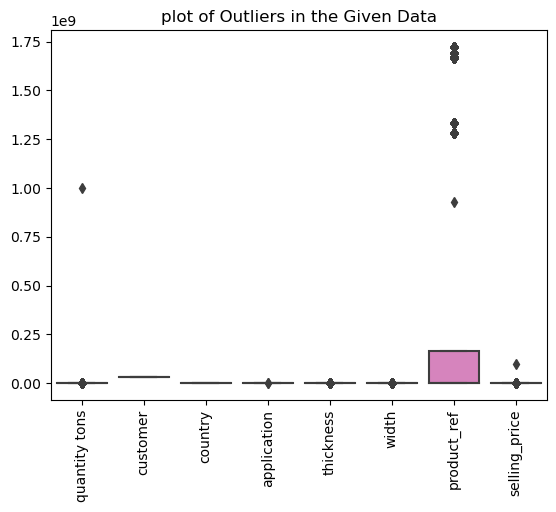

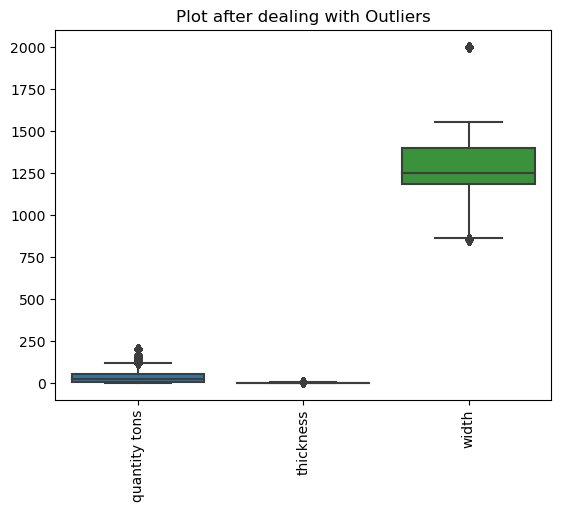

In [279]:
# Visualize Outliers

ax=sns.boxplot(data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('plot of Outliers in the Given Data')
plt.show()


data=dfr[['quantity tons','thickness','width']]  
plt.title('Plot after dealing with Outliers')
ax=sns.boxplot(data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()


# IDENTIFY SKEWNESS & DEALING IT

In [280]:
# Calculate skewness of original data

original_skewness = df[['quantity tons', 'thickness','width', 'selling_price']].skew()
print(original_skewness)


quantity tons    322.091590
thickness         25.399653
width              0.147834
selling_price    322.091025
dtype: float64


In [281]:
# DEALING WITH SKEWNESS
# Log transformation with a small constant
small_constant = 1e-6
df_transformed = df[['quantity tons', 'thickness', 'selling_price','width']] + small_constant
df_transformed = df_transformed.apply(np.log)

# Calculate skewness of transformed columns
skewness_transformed = df_transformed.skew()

print("Skewness of Transformed Columns:")
print(skewness_transformed)

Skewness of Transformed Columns:
quantity tons   -0.013772
thickness        0.400757
selling_price   -5.387941
width           -3.824297
dtype: float64


In [282]:
# Compare skewness measures

skewness_comparison = pd.DataFrame({
    'Original Skewness': original_skewness,
    'Transformed Skewness': skewness_transformed
})

print(skewness_comparison)

               Original Skewness  Transformed Skewness
quantity tons         322.091590             -0.013772
selling_price         322.091025             -5.387941
thickness              25.399653              0.400757
width                   0.147834             -3.824297


# Data Visualization of skewness reduction

Text(0.5, 1.0, 'Quantity Tons (Transformed)')

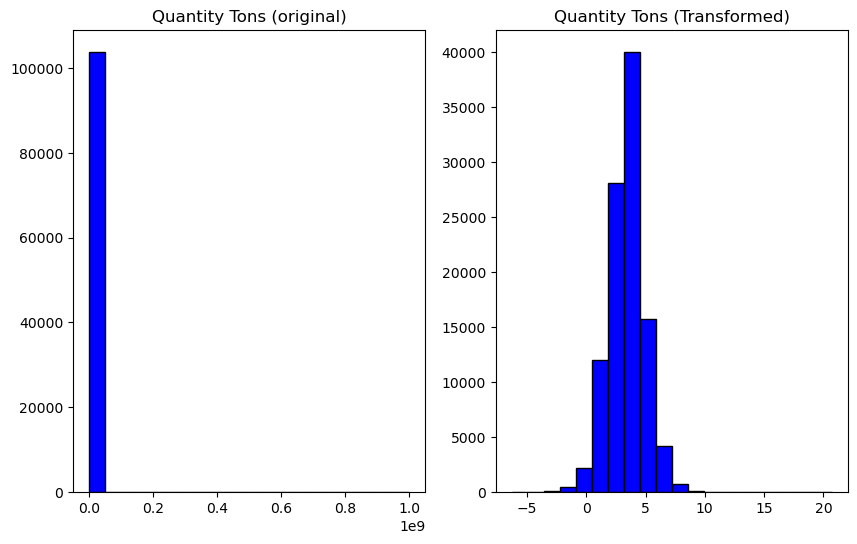

In [283]:
# Plot histograms of original and  transformed columns for skewness
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(df['quantity tons'], bins=20, color='blue', edgecolor='black')
plt.title('Quantity Tons (original)')

plt.subplot(1, 2, 2)
plt.hist(df_transformed['quantity tons'], bins=20, color='blue', edgecolor='black')
plt.title('Quantity Tons (Transformed)')


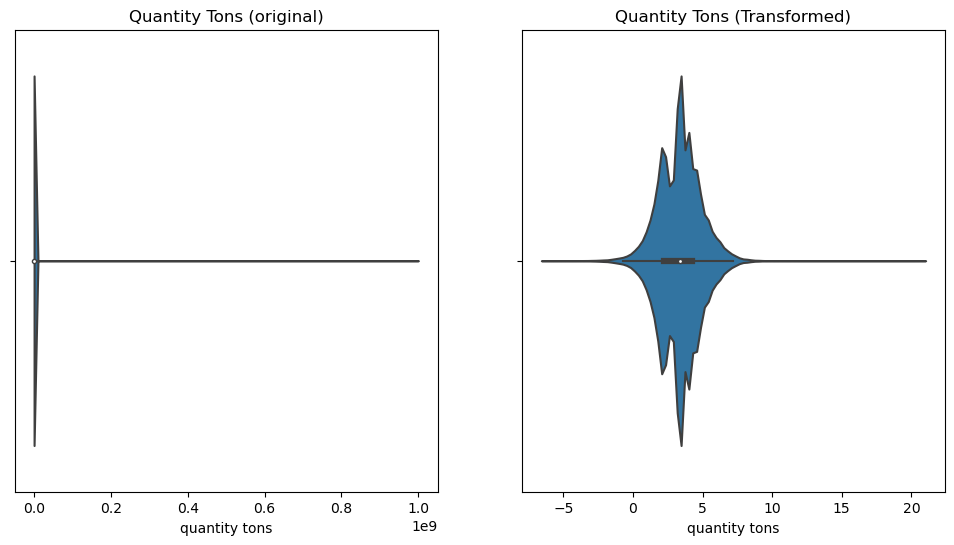

In [284]:
# Plots to show reduction of skewness of 'quantity tons'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.violinplot(x=df["quantity tons"])
plt.title('Quantity Tons (original)')

plt.subplot(1, 2, 2)
sns.violinplot(x=df_transformed["quantity tons"])
plt.title('Quantity Tons (Transformed)')
plt.show()

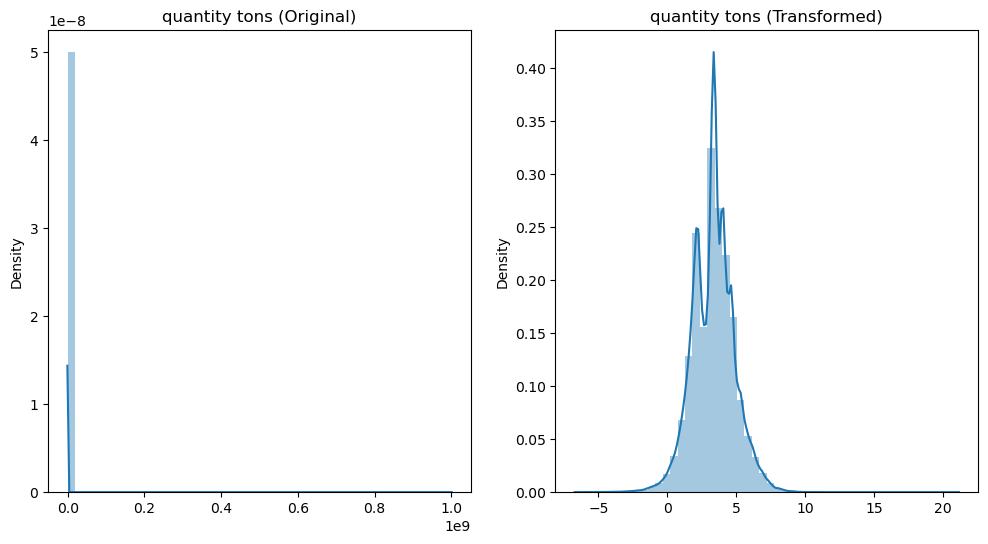

In [285]:
# displot for quantity tons
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.distplot(x=df["quantity tons"])
plt.title('quantity tons (Original)')

plt.subplot(1, 2, 2)
sns.distplot(x=df_transformed["quantity tons"])
plt.title('quantity tons (Transformed)')
plt.show()

Text(0.5, 1.0, 'Thickness (Transformed)')

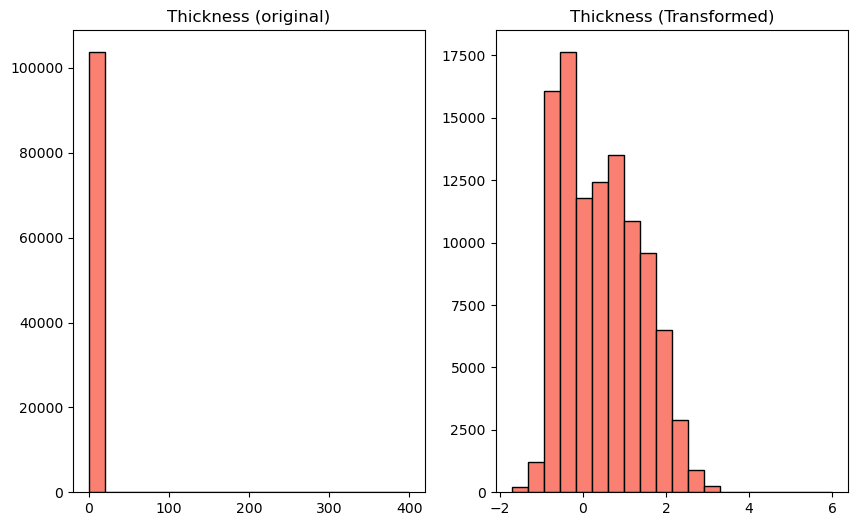

In [286]:
# histogram for thickness
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(df['thickness'], bins=20, color='salmon', edgecolor='black')
plt.title('Thickness (original)')

plt.subplot(1, 2, 2)
plt.hist(df_transformed['thickness'], bins=20, color='salmon', edgecolor='black')
plt.title('Thickness (Transformed)')

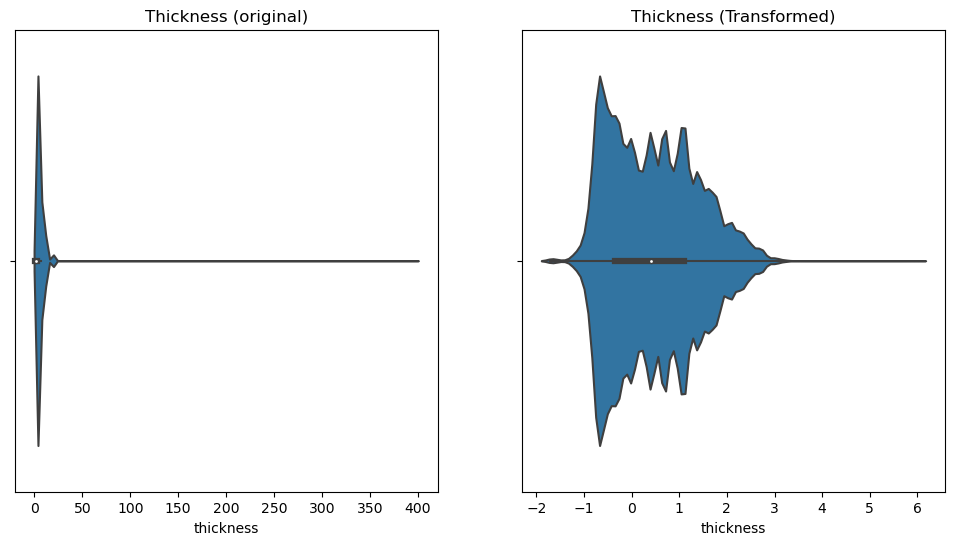

In [287]:
# Plots to show reduction of skewness of 'Thickness'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Thickness (original)')

sns.violinplot(x=df["thickness"])
plt.subplot(1, 2, 2)
sns.violinplot(x=df_transformed["thickness"])
plt.title('Thickness (Transformed)')
plt.show()

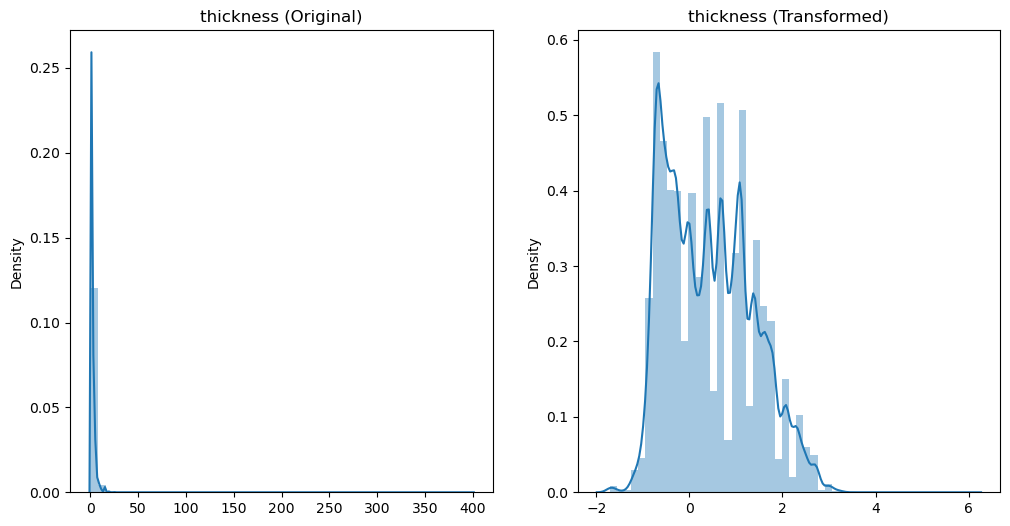

In [288]:
# displot for thickness
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.distplot(x=df["thickness"])
plt.title('thickness (Original)')

plt.subplot(1, 2, 2)
sns.distplot(x=df_transformed["thickness"])
plt.title('thickness (Transformed)')
plt.show()

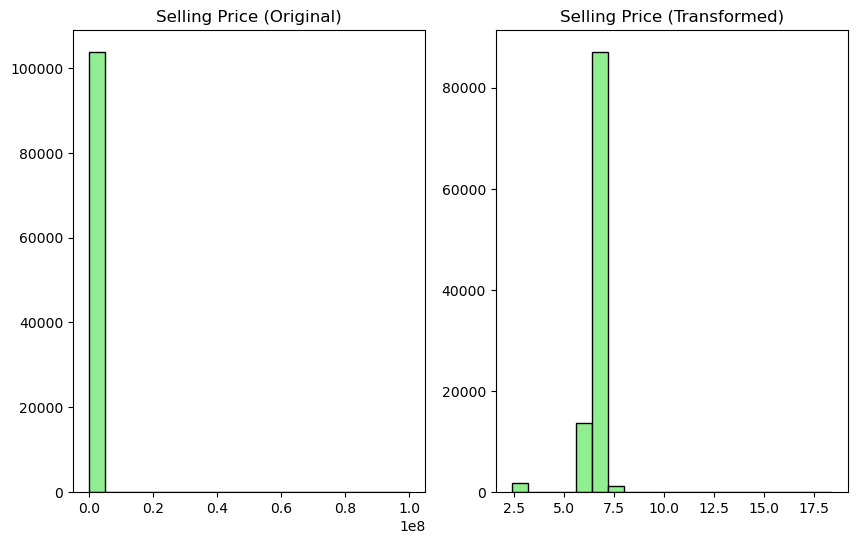

In [289]:
# histogram plot for thickness
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(df['selling_price'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Selling Price (Original)')


plt.subplot(1, 2, 2)
plt.hist(df_transformed['selling_price'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Selling Price (Transformed)')
plt.show()


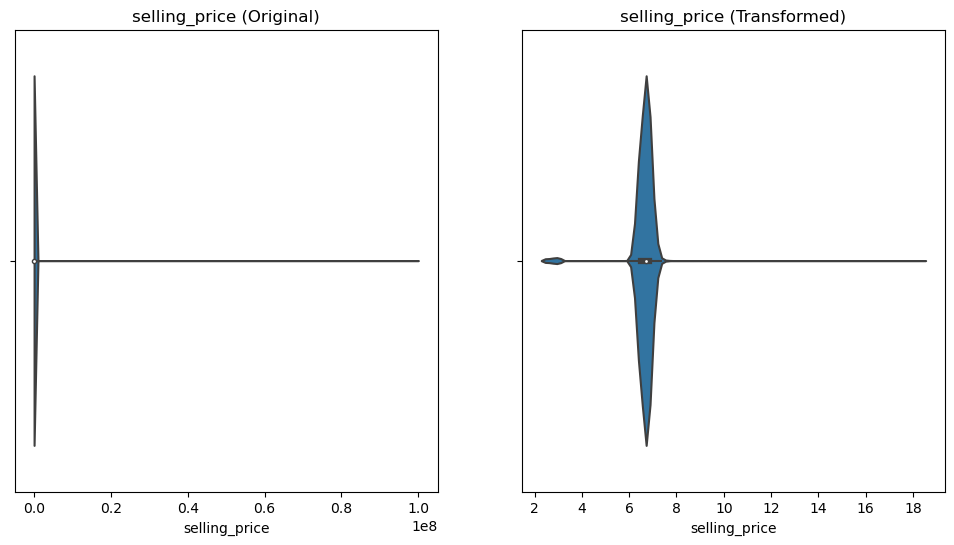

In [290]:
# Plots to show reduction of skewness of 'selling_price''
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(x=df["selling_price"])
plt.title('selling_price (Original)')

plt.subplot(1, 2, 2)
sns.violinplot(x=df_transformed["selling_price"])
plt.title('selling_price (Transformed)')
plt.show()

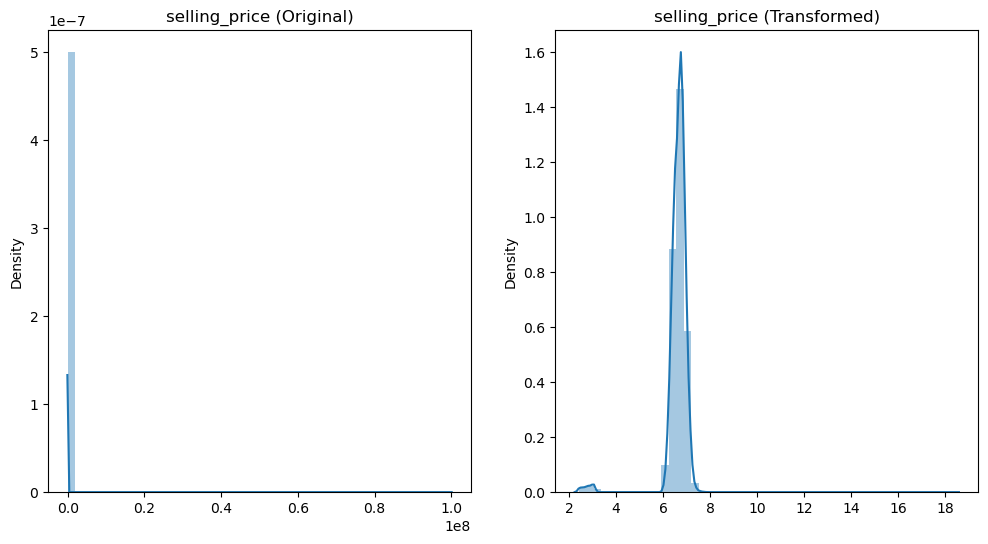

In [291]:
# displot for 'selling price'

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.distplot(x=df["selling_price"])
plt.title('selling_price (Original)')

plt.subplot(1, 2, 2)
sns.distplot(x=df_transformed["selling_price"])
plt.title('selling_price (Transformed)')
plt.show()
 

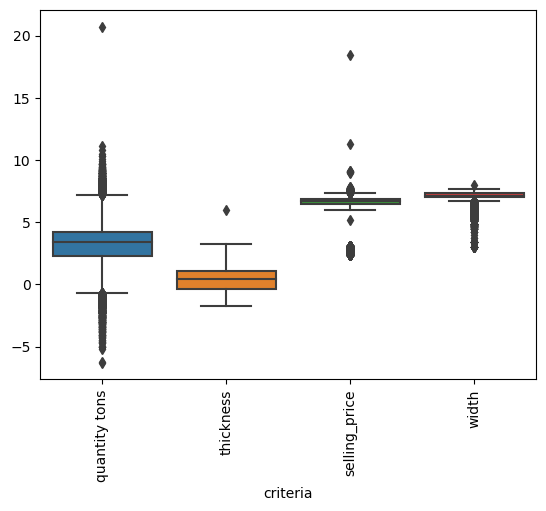

In [292]:
#draw boxplot

ax=sns.boxplot(data = df_transformed)
ax.set_xlabel('criteria')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

# Finding Unique Values

In [293]:
dfr['country'] = dfr['country'].astype(str)
country=dfr['country'].unique()
status=dfr['status'].unique()
item=dfr['item type'].unique()
print(country)
print(status)
print(item)

['28.0' '32.0' '30.0' '38.0' '27.0' '78.0' '25.0' '77.0' '84.0' '26.0'
 '113.0' '40.0' '39.0' '80.0' '79.0']
['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Revised'
 'Offered' 'Offerable']
['W' 'S' 'Others' 'PL' 'IPL' 'WI']


# Encode Categorical data

In [294]:
encode=LabelEncoder()
encode_country=encode.fit(country)
transformed_country = encode_country.transform(country)

encode=LabelEncoder()
encode_status=encode.fit(status)
transformed_status = encode_status.transform(status)

encode=LabelEncoder()
encode_item=encode.fit(item)
transformed_item = encode_item.transform(item)

print(transformed_country)
print(transformed_status)
print(transformed_item)

[ 4  6  5  7  3 11  1 10 14  2  0  9  8 13 12]
[7 0 6 1 2 5 4 3]
[4 3 1 2 0 5]


In [295]:
dfr['quantity tons'] = df_transformed ['quantity tons']
dfr['thickness'] = df_transformed['thickness']
dfr['selling_price'] = df_transformed['selling_price']

In [296]:
x=dfr[['quantity tons','application','thickness','width','selling_price','country','customer','product_ref']].corr()

<Axes: >

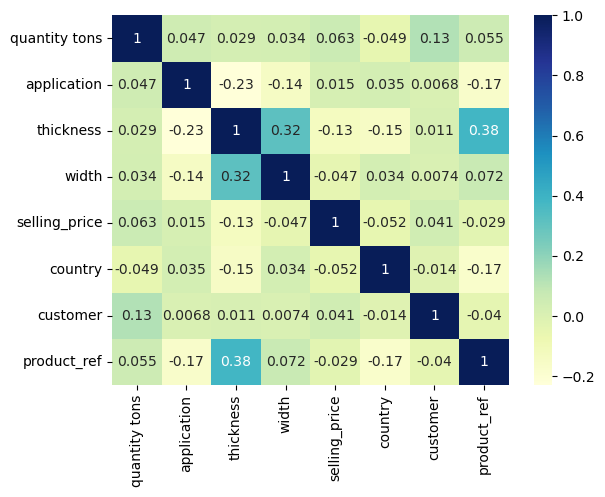

In [297]:
sns.heatmap(x, annot=True, cmap="YlGnBu")

# ML Regression model which predicts continuous variable ‘Selling_Price’

In [298]:
#import regression algorithm.
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer



In [299]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
X=dfr[['quantity tons','status','item type','application','thickness','width','country','customer','product_ref']]
y=dfr['selling_price']
# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X[['status']])
X_be = ohe2.fit_transform(X[['status']]).toarray()
# independent features after encoding
X = np.concatenate((X[['quantity tons', 'application', 'thickness', 'width','country','customer','product_ref']].values, X_ohe, X_be), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [300]:
# splitting data for training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(55376, 21)
(23733, 21)
(55376,)
(23733,)


RandomForestRegressor

In [301]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10, max_depth =20, random_state = 42)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test,y_test))

0.9762268122651793
0.9235549713983685


In [302]:
# Calculate y_pred 
y_pred = rf.predict(X_test)
print("y_pred:", y_pred)


y_pred: [6.86968431 6.4875695  6.6387438  ... 6.59389521 6.99384005 6.76133884]


In [303]:
# check metrics for RandomForestRegressor Model
from sklearn import metrics
#check MSE
print("MSE RandomForestRegressor:",metrics.mean_squared_error(y_test,y_pred))
#check MAE
print("MAE RandomForestRegressor:",metrics.mean_absolute_error(y_test, y_pred))


MSE RandomForestRegressor: 0.027651310606544726
MAE RandomForestRegressor: 0.11216139857394546


In [304]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators = 10, learning_rate = 0.1, random_state =42)
gbr.fit(X_train,y_train)
print(gbr.score(X_train,y_train))
print(gbr.score(X_test,y_test))

0.784701268463769
0.7766911327355686


In [305]:
# Calculate y_pred 
y_pred = gbr.predict(X_test)
print("y_pred:", y_pred)


y_pred: [6.81012169 6.62649279 6.81012169 ... 6.639786   6.60965321 6.6524105 ]


In [306]:
# check metrics for GradientBoostingRegressor Model
from sklearn import metrics
#check MSE
print("MSE GradientBoostingRegressor:",metrics.mean_squared_error(y_test,y_pred))
#check MAE
print("MAE GradientBoostingRegressor:",metrics.mean_absolute_error(y_test, y_pred))


MSE GradientBoostingRegressor: 0.0807741584099908
MAE GradientBoostingRegressor: 0.1872479546579425


In [307]:
from sklearn.tree import DecisionTreeRegressor 

dtr = DecisionTreeRegressor(random_state = 42) 
dtr.fit(X_train, y_train)

print(dtr.score(X_train, y_train))
print(dtr.score(X_test,y_test))


1.0
0.8820367389485867


In [308]:
# Calculate y_pred 
y_pred = dtr.predict(X_test)
print("y_pred:", y_pred)

y_pred: [6.82001637 6.57507584 6.59578052 ... 6.75693239 7.01391548 6.7178047 ]


In [309]:
# check metrics for DecisionTreeRegressor  Model
from sklearn import metrics
#check MSE
print("MSE DecisionTreeRegressor :",metrics.mean_squared_error(y_test,y_pred))
#check MAE
print("MAE DecisionTreeRegressor :",metrics.mean_absolute_error(y_test, y_pred))


MSE DecisionTreeRegressor : 0.04266907647443714
MAE DecisionTreeRegressor : 0.13232693726975644


In [310]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}


In [311]:
# check metrics for DecisionTreeRegressor  Model
from sklearn import metrics
#check MSE
print("MSE:",metrics.mean_squared_error(y_test,y_pred))
#check MAE
print("MAE :",metrics.mean_absolute_error(y_test, y_pred))
# R2 score
print("R squared error:",metrics.r2_score(y_test,y_pred))

MSE: 0.03483374904370987
MAE : 0.1321071257150291
R squared error: 0.9036983461710424


In [312]:
new_sample = np.array([[np.log(40), 10, np.log(250), 0, 28,30202938,1670798778,'PL','Won']])
new_sample_ohe = ohe.transform(new_sample[:, [7]]).toarray()
new_sample_be = ohe2.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Predicted selling price:', np.exp(new_pred))

Predicted selling price: [650.74404557]


In [313]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ohe.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('ohe2.pkl', 'wb') as f:
    pickle.dump(ohe2, f)



# Classifier ML

In [314]:
df.status.value_counts()

status
Won                74723
Lost               12920
Not lost for AM     9846
To be approved      2480
Revised             2038
Draft               1707
Offered               26
Offerable              3
Name: count, dtype: int64

In [315]:
dfc = dfr[dfr['status'].isin(['Won', 'Lost'])]
len(dfc)

66737

In [316]:
dfc.status.value_counts()

status
Won     57458
Lost     9279
Name: count, dtype: int64

In [317]:
dfr['item type'].unique()

array(['W', 'S', 'Others', 'PL', 'IPL', 'WI'], dtype=object)

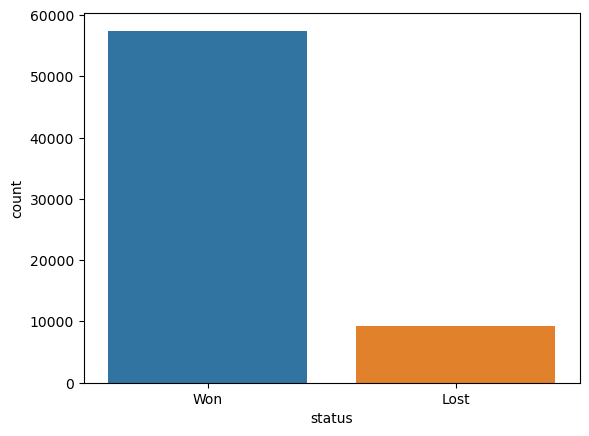

In [318]:

ax = sns.countplot(x ="status",data = dfc)

In [319]:
Y1 = dfc['status']
X1= dfc[['quantity tons','selling_price','item type','application','thickness','width','country','customer','product_ref']]

# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X1[['item type']])
X1_ohe = ohe.fit_transform(X1[['item type']]).toarray()
be = LabelBinarizer()
be.fit(Y1) 
y1 = be.fit_transform(Y1)

# independent features after encoding
X1 = np.concatenate((X1[['quantity tons', 'selling_price','application', 'thickness', 'width','country','customer','product_ref']].values, X1_ohe), axis=1)
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)

In [320]:
X1.shape

(66737, 14)

In [321]:
y1.shape

(66737, 1)

In [322]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X,y = smote.fit_resample(X1, y1)

In [323]:
X.shape

(114916, 14)

In [324]:
y.shape

(114916,)

In [325]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(86187, 14)
(28729, 14)
(86187,)
(28729,)


In [326]:
dfc.shape

(66737, 14)

In [327]:
from sklearn.linear_model import LogisticRegression
#import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.ensemble import ExtraTreesClassifier

In [328]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
print(LR.score(X_train, y_train))
print(LR.score(X_test, y_test))

0.6605984661259818
0.6662257649065404


In [329]:
xgb_model = XGBClassifier(objective="binary:logistic",random_state=42) 

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

print(xgb_model.score(X_train,y_train))
print(xgb_model.score(X_test,y_test))


0.956443547170687
0.944237530021929


In [330]:
y_predict= xgb_model.predict(X_test)
print("y_predict of xgb:",y_predict )


y_predict of xgb: [0 1 0 ... 0 0 1]


In [331]:
print("MSE of xgb:", mean_squared_error(y_test, y_predict))

MSE of xgb: 0.05576246997807094


In [332]:
clf = ExtraTreesClassifier(n_estimators=20, random_state=42)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

y_pred= clf.predict(X_test)
print("MSE of clf:", mean_squared_error(y_test, y_pred))

1.0
0.9688120018100177
MSE of clf: 0.031187998189982247


In [333]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[14084,   195],
       [  701, 13749]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

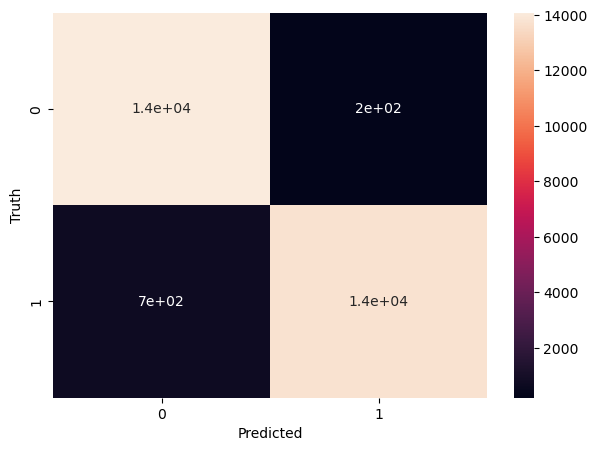

In [334]:
#draw heatmap
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [335]:
# from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix,classification_report, roc_curve, auc
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[14084,   195],
       [  701, 13749]], dtype=int64)

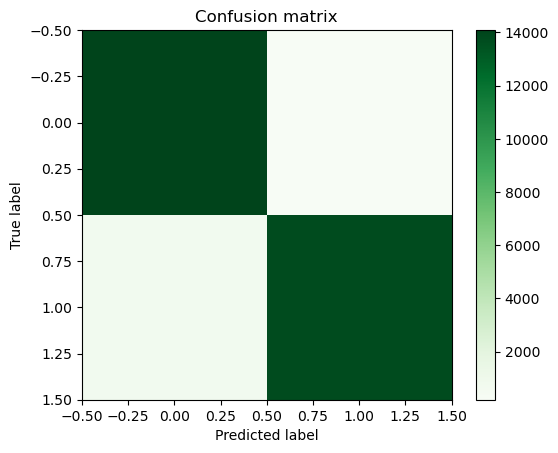

In [336]:
# plot_confusion_matrix(knn, X_test, y_test);

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

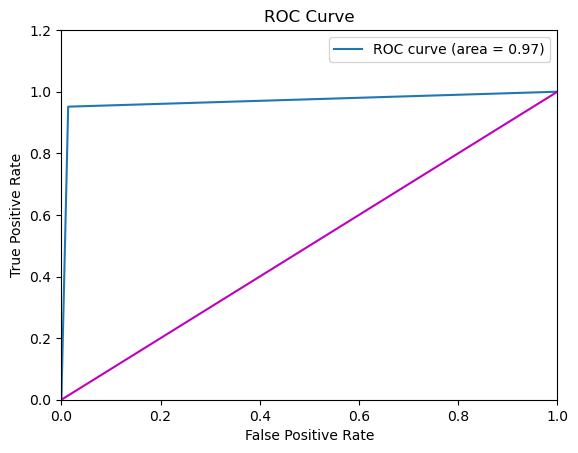

In [337]:
# ROC curve and AUC
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'm-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# check metrics

In [338]:
# for clf
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     14279
           1       0.99      0.95      0.97     14450

    accuracy                           0.97     28729
   macro avg       0.97      0.97      0.97     28729
weighted avg       0.97      0.97      0.97     28729



In [339]:
# Predict the status for a new sample
# 'quantity tons', 'selling_price','application', 'thickness', 'width','country','customer','product_ref']].values, X_ohe
new_sample = np.array([[np.log(700), np.log(956), 10, np.log(2),1500,28.0,30202938,1670798778,'W']])
new_sample_ohe = ohe.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
# new_sample = scaler.transform(new_sample)
new_pred = clf.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Won


In [340]:
# Saving the model
import pickle
with open('cmodel.pkl', 'wb') as file:
    pickle.dump(clf, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('cohe.pkl', 'wb') as f:
    pickle.dump(ohe, f)
